# UNDERSTANDING THE PROBLEM STATEMENT

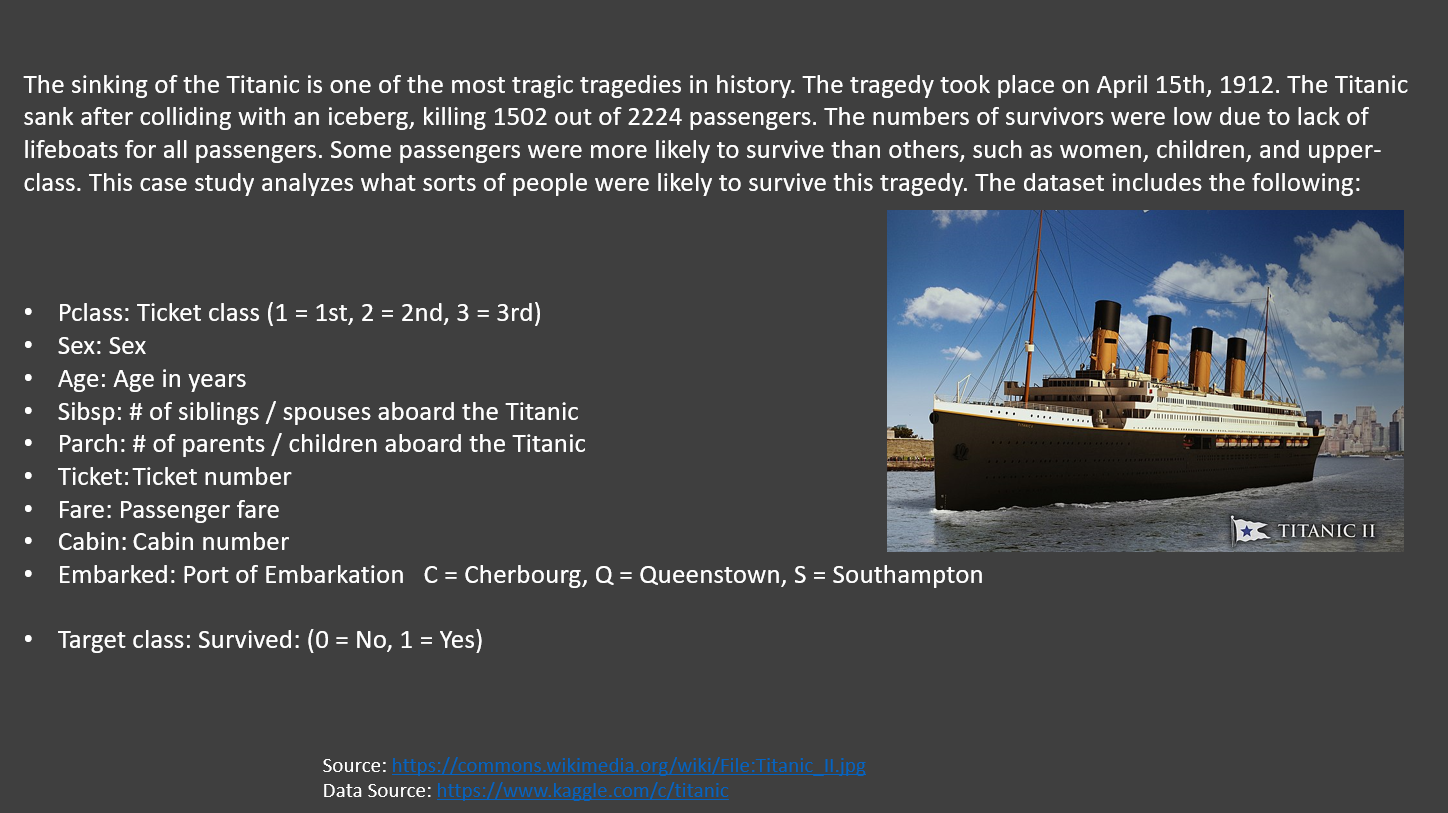

Data Source: https://www.kaggle.com/c/titanic

# IMPORTING LIBRARIES AND DATASETS

In [ ]:
# Import Key Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  


In [ ]:
# Read the data using pandas dataframe
titanic_df = pd.read_csv('titanic.csv')

In [ ]:
titanic_df.head()


In [ ]:
titanic_df.tail(7)

# PERFORMING DATA VISUALIZATION 

In [ ]:
# counting the number of survivors and non-survivors
survived_df = titanic_df[titanic_df['Survived']==1]
no_survived_df = titanic_df[titanic_df['Survived']==0]


In [ ]:
survived_df

In [ ]:
# Counting the survived and deceased 
print("Total =", len(titanic_df))

print("Number of passengers who survived =", len(survived_df))
print("Percentage Survived =",1. *  len(survived_df) / len(titanic_df) * 100.0, "%")
 
print("Number of passengers who did not Survive =", len(no_survived_df))
print("Percentage who did not survive =", 1. * len(no_survived_df) / len(titanic_df) * 100.0, "%")
         

In [ ]:
sns.countplot(x= 'Pclass', data=titanic_df)

In [ ]:
sns.countplot(x='Pclass', hue = 'Survived', data=titanic_df)

In [ ]:
plt.figure(figsize=[15,10])
plt.subplot(211)
sns.countplot(x= 'Pclass', data=titanic_df)
plt.subplot(212)
sns.countplot(x='Pclass', hue = 'Survived', data=titanic_df)

In [ ]:
plt.figure(figsize=[15,10])
plt.subplot(211)
sns.countplot(x='SibSp',data=titanic_df)
plt.subplot(212)
sns.countplot(x='SibSp', hue='Survived', data=titanic_df)

# PERFORMING DATA VISUALIZATION

In [ ]:
plt.figure(figsize = [15, 10])
plt.subplot(211)
sns.countplot(x='Parch', data=titanic_df)
plt.subplot(212)
sns.countplot(x='Parch', hue='Survived', data=titanic_df)


In [ ]:
plt.figure(figsize = [15, 10])
plt.subplot(211)
sns.countplot(x = 'Sex', data = titanic_df)
plt.subplot(212)
sns.countplot(x = 'Sex', hue = 'Survived', data = titanic_df)

In [ ]:
# Age Histogram 
plt.figure(figsize=[11,6])
titanic_df['Age'].hist(bins=40)

In [ ]:
plt.figure(figsize=[11,6])
titanic_df['Fare'].hist(bins=40)

# PERFORMING DATA CLEANING AND FEATURE ENGINEERING

In [ ]:
sns.heatmap(titanic_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [ ]:
titanic_df.drop('Cabin', axis=1, inplace=True)

In [ ]:
titanic_df

In [ ]:
titanic_df.drop(['Name', 'Ticket', 'Embarked', 'PassengerId'], axis = 1, inplace = True)

In [ ]:
titanic_df

In [ ]:
sns.heatmap(titanic_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [ ]:
# Let's get the average age for male (~29) and female (~25)
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'Sex', y = 'Age', data = titanic_df)

In [ ]:
def Fill_Age(data):
    age = data[0]
    sex = data[1]

    if pd.isnull(age):
        if sex is 'male': 
            return 29
        else:
            return 25
    else:
        return age
        

In [ ]:
titanic_df['Age'] = titanic_df[['Age', 'Sex']].apply(Fill_Age,axis=1)

In [ ]:
sns.heatmap(titanic_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [ ]:

pd.get_dummies(titanic_df['Sex'])

In [ ]:
male = pd.get_dummies(titanic_df['Sex'], drop_first = True)


In [ ]:

titanic_df.drop(['Sex'], axis = 1, inplace = True)

In [ ]:
titanic_df

In [ ]:

titanic_df = pd.concat([titanic_df, male], axis = 1)

In [ ]:
titanic_df

# TRAINING LOGISTIC REGRESSION CLASSIFIER MODEL

In [ ]:

X = titanic_df.drop('Survived', axis = 1).values
y = titanic_df['Survived'].values



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# ASSESSING TRAINED MODEL PERFORMANCE

In [ ]:
y_predict_test = classifier.predict(X_test)
y_predict_test

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True, fmt = "d")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

In [ ]:
from sklearn.naive_bayes import MultinomialNB

classifier_NB = MultinomialNB()
classifier_NB.fit(X_train, y_train)

In [ ]:
y_predict_test_NB = classifier_NB.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict_test_NB)
sns.heatmap(cm, annot = True, fmt = "d")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test_NB))